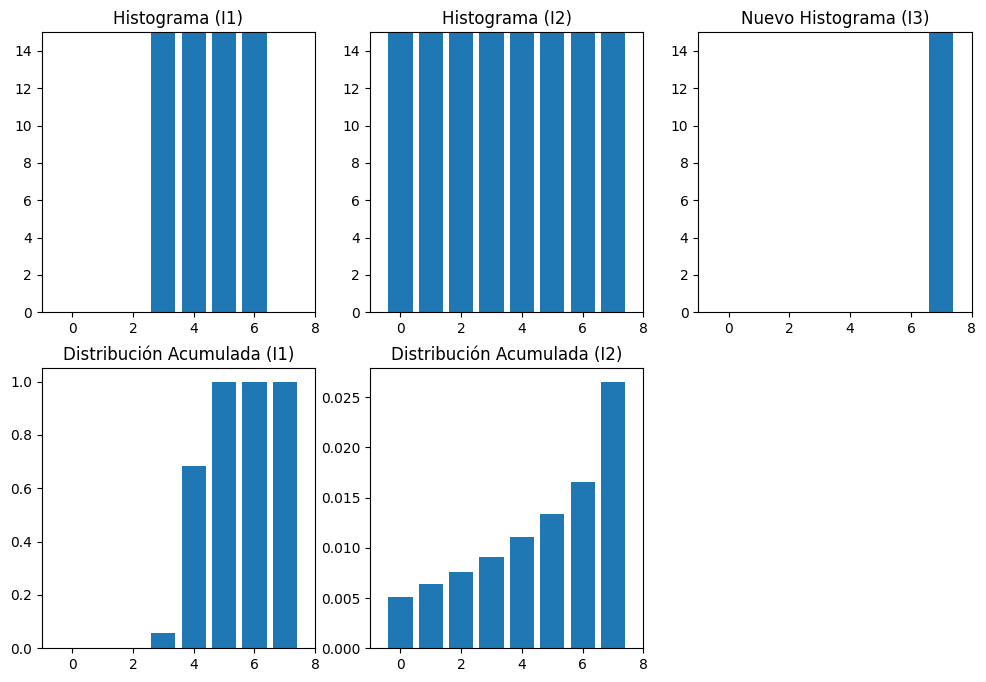

True

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_histograms(source, template):
    """
    Coincide el histograma de la imagen fuente con el de la imagen plantilla.
    """
    # Calcular los histogramas y las distribuciones acumuladas
    src_hist, _ = np.histogram(source.flatten(), 256, [0, 256])
    tmpl_hist, _ = np.histogram(template.flatten(), 256, [0, 256])
    
    src_cdf = src_hist.cumsum()
    tmpl_cdf = tmpl_hist.cumsum()
    
    # Normalizar las distribuciones acumuladas
    src_cdf_normalized = src_cdf * (255 / src_cdf[-1])
    tmpl_cdf_normalized = tmpl_cdf * (255 / tmpl_cdf[-1])
    
    # Crear la tabla de mapeo
    lookup_table = np.zeros(256)
    g_j = 0
    for g_i in range(256):
        while tmpl_cdf_normalized[g_j] < src_cdf_normalized[g_i] and g_j < 255:
            g_j += 1
        lookup_table[g_i] = g_j
    
    # Aplicar la transformación de mapeo a la imagen
    matched_image = cv2.LUT(source, lookup_table.astype(np.uint8))
    
    return matched_image

# Cargar las imágenes en escala de grises
sydney = cv2.imread('sydney.jpg', cv2.IMREAD_GRAYSCALE)
cameraman = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si las imágenes se cargaron correctamente
if sydney is None or cameraman is None:
    print("Error al cargar las imágenes.")
    exit()

# Aplicar la coincidencia de histogramas
sydney_new = match_histograms(sydney, cameraman)

# Guardar la nueva imagen con el histograma coincidente
cv2.imwrite('sydney_new.jpg', sydney_new)

# Mostrar los histogramas para verificar
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(sydney, cmap='gray')
plt.title('Imagen Original: Sydney')

plt.subplot(2, 2, 2)
plt.imshow(cameraman, cmap='gray')
plt.title('Imagen de Referencia: Cameraman')

plt.subplot(2, 2, 3)
plt.imshow(sydney_new, cmap='gray')
plt.title('Nueva Imagen: Sydney con Histograma Coincidente')

plt.subplot(2, 2, 4)
plt.hist(sydney_new.flatten(), 256, [0, 256], color='r')
plt.title('Histograma de Sydney Coincidente')

plt.show()
